In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Ferromagnetic

In [89]:
x20000r = np.array([
[1.8,                0.7025177917480468750159473010561935260587],
[1.8475000000000001, 0.7665833435058593750155026087588850183807],
[1.895,              0.8465737609863281250149473786619598245085],
[1.9425,             0.9593291320800781250141647202186968509952],
[1.99,               1.215225250244140625012388492128304583184]])

x10000 = np.array([
[0.8,                0.0334903869628906250205911591895],
[0.9277777777777778, 0.101582916259765625020118514805],
[1.0555555555555556, 0.169126312255859375019649682069],
[1.1833333333333333, 0.238500152587890625019168143838],
[1.3111111111111111, 0.31171792602539062501865992407],
[1.4388888888888889, 0.391525299072265625018105964522],
[1.5666666666666667, 0.481766204833984375017479583658],
[1.6944444444444444, 0.589579376220703125016731230049],
[1.8222222222222222, 0.731072723388671875015749095347],
[1.95,               0.983307952880859375013998278245]])

x5000l = np.array([
[0.745, 0.003591222763061523458298695496482332099181],
[0.75,               0.006399810791015625020779200503805682342939],
[0.7633333333333333, 0.0137215881347656250207283785269704243226],
[0.7766666666666666, 0.02086032104492187502067882709955604775276],
[0.79,               0.02818209838867187502062800512272078973242],
[0.8033333333333333, 0.03532083129882812502057845369530641316258],
[0.8166666666666667, 0.04245956420898437502052890226789203659274],
[0.83,               0.04959829711914062502047935084047766002291],
[0.8433333333333333, 0.05673703002929687502042979941306328345307],
[0.8566666666666667, 0.06387576293945312502038024798564890688324],
[0.87,               0.0710144958496093750203306965582345303134],
[0.8833333333333333, 0.07797018432617187502028241568024103519408],
[0.8966666666666666, 0.08510891723632812502023286425282665862424],
[0.9099999999999999, 0.0922476501464843750201833128254122820544],
[0.9233333333333333, 0.09920333862304687502013503194741878693508],
[0.9366666666666666, 0.1063420715332031250200854805200044103652]])

x5000r = np.array([[1.8,                0.7025177917480468750159473010561935260587],
[1.8133333333333335, 0.7193578796386718750158304105094724326119],
[1.8266666666666667, 0.7371131896972656250157071672156469319126],
[1.84,               0.7557837219238281250155775711747170239607],
[1.8533333333333333, 0.7753694763183593750154416223866827087563],
[1.8666666666666667, 0.7964195861816406250152955092032813419478],
[1.8800000000000001, 0.8189340515136718750151392316245129235353],
[1.8933333333333333, 0.8432789611816406250149702485515356906176],
[1.9066666666666667, 0.8700034484863281250147847483360869988434],
[1.92,               0.899656646728515625014578919329904203861],
[1.9333333333333333, 0.9331537780761718750143464087858828984179],
[1.9466666666666668, 0.972325286865234375014074511209814268009],
[1.96,               1.020099884033203125013742897810964209426],
[1.9733333333333334, 1.082701080322265625013308369909022753352],
[1.98, 1.124252166748046875013019955190482664087],
[1.9833333333333334, 1.149329254150390625012845889919821905367],
[1.9866666666666666, 1.178982452392578125012640060913639110385],
[1.99, 1.215225250244140625012388492128304583184]])

x2000 = np.array([
[0.8,                0.03349038696289062502059115918951522766767],
[0.8785714285714286, 0.07559060668945312502029893282271249405069],
[0.9571428571428572, 0.1171416931152343750200105181041724047852],
[1.0357142857142856, 0.1586927795410156250197221033856323155198],
[1.1142857142857143, 0.2006099548339843750194311475682504633533],
[1.1928571428571428, 0.2438084411621093750191312979049224410333],
[1.2714285714285714, 0.2884712829589843750188212838462273671092],
[1.35,               0.3351476135253906250184972937439025972295],
[1.4285714285714284, 0.3847526550292968750181529748508437241417],
[1.5071428571428571, 0.4382016296386718750177819744199463405931],
[1.5857142857142856, 0.4965928039550781250173766691546851578809],
[1.6642857142857141, 0.5619396667480468750169230830114304800493],
[1.7428571428571427, 0.6375370178222656250163983461006064409893],
[1.8214285714285712, 0.7299744567871093750157567186430613084824],
[1.9, 0.8562751159667968750148800395426531076315]
])

y2000 = np.array([
[0.8,                0.04850003051757812502048697413700294872596],
[0.8785714285714286, 0.1281243591308593750199342851389195177547],
[0.9571428571428572, 0.2156195983886718750193269625157381844116],
[1.0357142857142856, 0.3122670593261718750186561124215127785431],
[1.1142857142857143, 0.4197141418457031250179102999114553670945],
[1.1928571428571428, 0.5403404235839843750170730078430944912093],
[1.2714285714285714, 0.6759763488769531250161315307222213363825],
[1.35,               0.8297336730957031250150642692086809179552],
[1.4285714285714284, 1.004724151611328125013849623962318251269],
[1.5071428571428571, 1.204608673095703125012462183994715707314],
[1.5857142857142856, 1.434695526123046875010865103372667724024],
[1.6642857142857141, 1.700842132568359375009017724514706094985],
[1.7428571428571427, 2.011102447509765625006864143246312036373],
[1.8214285714285712, 2.375910003662109375004331938250495305509],
[1.9,                2.809542266845703125001322006672427149254],
])

In [99]:
1/0.31

3.2258064516129035

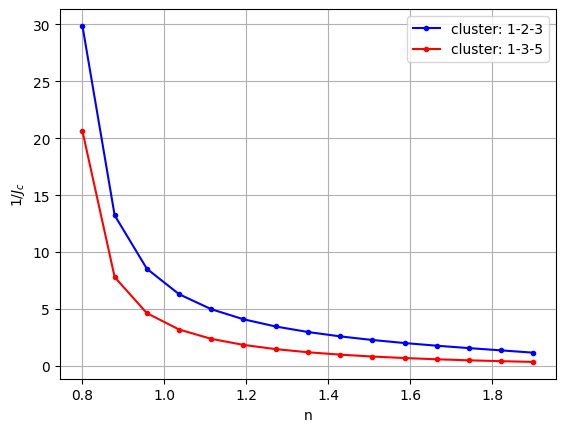

In [90]:
plt.figure()
#plt.plot(x10000[:,0], 1/x10000[:,1], marker='.', color='k')
#plt.plot(x5000l[:,0], 1/x5000l[:,1], marker='.', color='r')
#plt.plot(x5000r[:,0], 1/x5000r[:,1], marker='.', color='r')
plt.plot(x2000[:,0], 1/x2000[:,1], marker='.', color='blue', label='cluster: 1-2-3')
plt.plot(y2000[:,0], 1/y2000[:,1], marker='.', color='red', label='cluster: 1-3-5')
plt.xlabel('n')
plt.ylabel('$1/J_c$')
plt.grid(True)
plt.legend()
#plt.xlim((0.7, 2.05))
#plt.ylim((0, 31))
#plt.savefig('Jc-n.png')
plt.show()

# Spin Glass

In [118]:
h_n1_5000 = np.array([
[0.0, 3.6624082790691226],
[0.034482758620689655 ,3.4017223108958357],
[0.06896551724137931  ,3.351592512210967],
[0.10344827586206896  ,2.8587213532958295],
[0.13793103448275862  ,2.5617041808301773],
[0.1724137931034483   ,2.134404950697513],
[0.20689655172413793  ,2.3746436212212414],
[0.24137931034482757  ,2.967230249865449],
[0.27586206896551724  ,1.8424005208441605],
[0.3448275862068966   ,1.887687934124147],
[0.3793103448275862   ,1.576305161202348],
[0.41379310344827586  ,2.075274283563536],
[0.4482758620689655   ,1.330919353738651],
[0.48275862068965514  ,0.5670334896167744],
])

h_n1_22000 = np.array([
[0.0, 3.616747725727251],
[0.07142857142857142,3.3447533682351205],
[0.14285714285714285, 2.8560265213980145],
[0.21428571428571427, 1.9202369237635126],
[0.2857142857142857, 1.6809809548321812],
[0.3571428571428571, 1.4795701133824506],
[0.4, 1.195047948037132],
[0.42857142857142855, 1.0504527914798976]
])

v_n1_22000 = np.array([
[0.183380126953125, 2.223333333333333],
[0.155975341796875, 2.5],
[0.155975341796875, 2.5075]
])

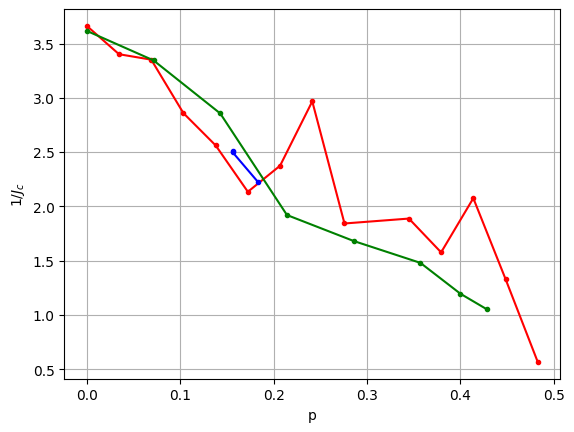

In [119]:
plt.figure()
plt.plot(h_n1_5000[:,0], h_n1_5000[:,1], marker='.', color='r')
plt.plot(h_n1_22000[:,0], h_n1_22000[:,1], marker='.', color='g')
plt.plot(v_n1_22000[:,0], v_n1_22000[:,1], marker='.', color='b')
plt.xlabel('p')
plt.ylabel('$1/J_c$')
plt.grid(True)
#plt.xlim((0.7, 2))
#plt.ylim((0, 31))
#plt.savefig('Jc-n_right.png')
plt.show()